# 과제2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 8)

## 1 - a

In [46]:
def solve_lu(A,b):
    N = len(A)
    x = [0 for j in range(N)]
    for k in range(N-1):
        for i in range(k+1,N):
            b[i] -= A[i][k] * b[k]
    
    x[-1] = b[-1] / A[-1][-1]
    for i in range(N-2,-1,-1):
        s = b[i]
        for j in range(i+1,N):
            s -= A[i][j] * x[j]
        x[i] = s / A[i][i]
    return x

In [47]:
for i in range(1,10):
    N = 2**i
    h = 1 / N
    A = [[0 for i in range(N+1)] for j in range(N+1)]
    A[0][0], A[-1][-1], A[1][0], A[-2][-1] = 1, 1, 1, 1
    for i in range(1,N):
        for j in range(1,N):
            if i == j: A[i][j] = 4
            if i == j-1: A[i][j] = 1
            if i-1 == j: A[i][j] = 1

    f = lambda x: np.e ** x
    B = [0 for i in range(N+1)]
    for i in range(1,N):
        B[i] = 6*(f(h*(i+1)) - 2*f(h*i) + f(h*(i-1)))/h

    M = solve_lu(A,B)
    a = [0 for i in range(N)]
    b = [0 for i in range(N)]

    for i in range(N):
        a[i] = (M[i]-M[i+1])*h/6 + (f(h*(i+1))-f(h*i))/h

    for i in range(N):
        b[i] = f(h*(i+1)) - M[i+1]*h*h/6 - a[i]*h

    S = lambda j,x: -M[j]*((x-h*(j+1))**3)/(6*h) + M[j+1]*((x-h*j)**3)/(6*h) + a[j]*(x-h*j) + b[j]

    error = [abs(f(i*h-h/2) - S(i-1,i*h-h/2)) for i in range(1,N+1)]
    err = max(error)
    print("1 / %d\t\tError :"%(N),err, end = "\t\t")
    if N > 2: print("alpha :", last/err)
    else: print()
    last = err

1 / 2		Error : 0.046774691386031186		
1 / 4		Error : 0.016185379865051974		alpha : 2.8899347297389477
1 / 8		Error : 0.0046580728943892424		alpha : 3.474694413766612
1 / 16		Error : 0.0012446027388079983		alpha : 3.742618225997518
1 / 32		Error : 0.0003214026717528462		alpha : 3.872409435865172
1 / 64		Error : 8.164773912433532e-05		alpha : 3.9364552552203045
1 / 128		Error : 2.0575057219751614e-05		alpha : 3.9682873419158824
1 / 256		Error : 5.164216871911265e-06		alpha : 3.9841582431716955
1 / 512		Error : 1.2936146953634875e-06		alpha : 3.9920827201643627


## 1 - b

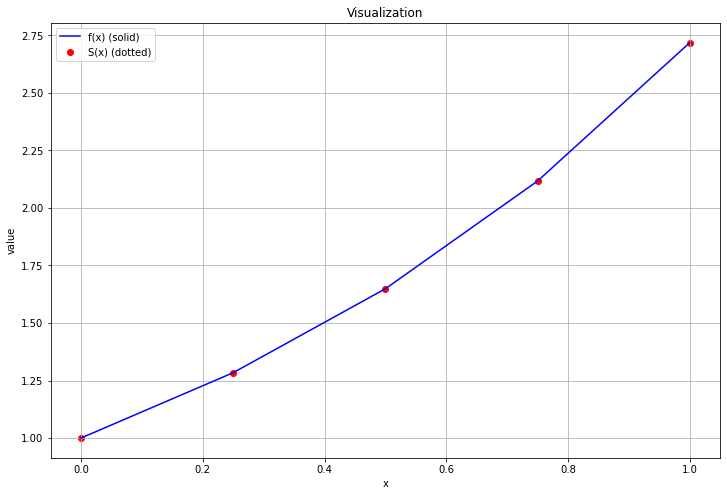

In [48]:
N = 4
h = 1 / N
A = [[0 for i in range(N+1)] for j in range(N+1)]
A[0][0], A[-1][-1], A[1][0], A[-2][-1] = 1, 1, 1, 1
for i in range(1,N):
    for j in range(1,N):
        if i == j: A[i][j] = 4
        if i == j-1: A[i][j] = 1
        if i-1 == j: A[i][j] = 1

f = lambda x: np.e ** x
B = [0 for i in range(N+1)]
for i in range(1,N):
    B[i] = 6*(f(h*(i+1)) - 2*f(h*i) + f(h*(i-1)))/h

M = solve_lu(A,B)
a = [0 for i in range(N)]
b = [0 for i in range(N)]

for i in range(N):
    a[i] = (M[i]-M[i+1])*h/6 + (f(h*(i+1))-f(h*i))/h

for i in range(N):
    b[i] = f(h*(i+1)) - M[i+1]*h*h/6 - a[i]*h

S = lambda j,x: -M[j]*((x-h*(j+1))**3)/(6*h) + M[j+1]*((x-h*j)**3)/(6*h) + a[j]*(x-h*j) + b[j]

x = [h*i for i in range(N+1)]
y = [f(x[i]) for i in range(N+1)]
s = [S(i,x[i]) for i in range(N)] + [S(N-1,x[-1])]

plt.plot(x, y, color='blue', label='f(x) (solid)')
plt.scatter(x, s, color='red', label='S(x) (dotted)')

plt.xlabel('x')
plt.ylabel('value')
plt.title('Visualization')
plt.legend()
plt.grid()
plt.show()

## 2 - three point formula

In [64]:
f = lambda x: x*np.sin(x)
f1 = lambda x: np.sin(x) + x*np.cos(x)
x0 = 1
real = f1(x0)
for i in range(1,10):
    N = 2**i
    h = 1 / N
    app = (f(x0+h)-f(x0-h))/(2*h)
    err = abs(real - app)
    print("1 / %d"%(N), end="\t\t")
    print("Approximate :", "%.15f"%app, end="\t     ")
    print("f'(1) :", real, end = "\t     ")
    print("Error :", err)

1 / 2		Approximate : 1.256529710603980	     f'(1) : 1.3817732906760363	     Error : 0.12524358007205616
1 / 4		Approximate : 1.350003408353964	     f'(1) : 1.3817732906760363	     Error : 0.031769882322071785
1 / 8		Approximate : 1.373801915619834	     f'(1) : 1.3817732906760363	     Error : 0.007971375056202712
1 / 16		Approximate : 1.379778636964907	     f'(1) : 1.3817732906760363	     Error : 0.0019946537111288354
1 / 32		Approximate : 1.381274514073107	     f'(1) : 1.3817732906760363	     Error : 0.0004987766029291851
1 / 64		Approximate : 1.381648589451022	     f'(1) : 1.3817732906760363	     Error : 0.0001247012250147339
1 / 128		Approximate : 1.381742114927633	     f'(1) : 1.3817732906760363	     Error : 3.1175748403500236e-05
1 / 256		Approximate : 1.381765496711296	     f'(1) : 1.3817732906760363	     Error : 7.79396474048788e-06
1 / 512		Approximate : 1.381771342183129	     f'(1) : 1.3817732906760363	     Error : 1.948492907688504e-06


## 2 - five point formula

In [65]:
f = lambda x: x*np.sin(x)
f1 = lambda x: np.sin(x) + x*np.cos(x)
x0 = 1
real = f1(x0)
for i in range(1,10):
    N = 2**i
    h = 1 / N
    app = (f(x0-2*h) - 8*f(x0-h) + 8*f(x0+h) - f(x0+2*h))/(12*h)
    err = abs(real - app)
    print("1 / %d"%(N), end="\t\t")
    print("Approximate :", "%.15f"%app, end="\t     ")
    print("f'(1) :", real, end = "\t     ")
    print("Error :", err)

1 / 2		Approximate : 1.372273805196746	     f'(1) : 1.3817732906760363	     Error : 0.009499485479290026
1 / 4		Approximate : 1.381161307603959	     f'(1) : 1.3817732906760363	     Error : 0.0006119830720767716
1 / 8		Approximate : 1.381734751375123	     f'(1) : 1.3817732906760363	     Error : 3.853930091324287e-05
1 / 16		Approximate : 1.381770877413266	     f'(1) : 1.3817732906760363	     Error : 2.4132627705064635e-06
1 / 32		Approximate : 1.381773139775841	     f'(1) : 1.3817732906760363	     Error : 1.5090019545027644e-07
1 / 64		Approximate : 1.381773281243659	     f'(1) : 1.3817732906760363	     Error : 9.432377767737421e-09
1 / 128		Approximate : 1.381773290086499	     f'(1) : 1.3817732906760363	     Error : 5.89537751949365e-10
1 / 256		Approximate : 1.381773290639184	     f'(1) : 1.3817732906760363	     Error : 3.6852743079407446e-11
1 / 512		Approximate : 1.381773290673749	     f'(1) : 1.3817732906760363	     Error : 2.2872814753327475e-12


## 3 - composite trapezoidal rule

In [71]:
f = lambda x: x*(np.e**x)
real = 1
for i in range(1,10):
    N = 2**i
    h = 1 / N
    x = [h*i for i in range(N+1)]
    app = 0
    for j in range(N):
        app += h*(f(x[j])+f(x[j+1]))/2
    err = abs(real - app)
    print("1 / %d"%(N), end="\t\t")
    print("Approximate :", "%.15f"%app, end="\t     ")
    print("Integral :", real, end = "\t")
    print("Error :", err)

1 / 2		Approximate : 1.091750774789793	     Integral : 1	Error : 0.09175077478979343
1 / 4		Approximate : 1.023064479052757	     Integral : 1	Error : 0.023064479052757214
1 / 8		Approximate : 1.005774107367820	     Integral : 1	Error : 0.005774107367819692
1 / 16		Approximate : 1.001444027067708	     Integral : 1	Error : 0.0014440270677076317
1 / 32		Approximate : 1.000361038046700	     Integral : 1	Error : 0.0003610380466998464
1 / 64		Approximate : 1.000090261466906	     Integral : 1	Error : 9.026146690560566e-05
1 / 128		Approximate : 1.000022565488932	     Integral : 1	Error : 2.256548893231347e-05
1 / 256		Approximate : 1.000005641379871	     Integral : 1	Error : 5.641379871024199e-06
1 / 512		Approximate : 1.000001410345445	     Integral : 1	Error : 1.4103454450964392e-06


## 3 – composite Simpsom rule

In [72]:
f = lambda x: x*(np.e**x)
real = 1
for i in range(1,10):
    N = 2**i
    h = 1 / N
    x = [h*i for i in range(N+1)]
    app = 0
    for j in range(N//2):
        app += h*(f(x[2*j]) + 4*f(x[2*j+1]) + f(x[2*j+2]))/3
    err = abs(real - app)
    print("1 / %d"%(N), end="\t\t")
    print("Approximate :", "%.15f"%app, end="\t     ")
    print("Integral :", real, end = "\t")
    print("Error :", err)

1 / 2		Approximate : 1.002620728309884	     Integral : 1	Error : 0.00262072830988358
1 / 4		Approximate : 1.000169047140412	     Integral : 1	Error : 0.00016904714041166002
1 / 8		Approximate : 1.000010650139507	     Integral : 1	Error : 1.0650139506962475e-05
1 / 16		Approximate : 1.000000666967670	     Integral : 1	Error : 6.669676699821991e-07
1 / 32		Approximate : 1.000000041706364	     Integral : 1	Error : 4.170636414002615e-08
1 / 64		Approximate : 1.000000002606974	     Integral : 1	Error : 2.60697419207645e-09
1 / 128		Approximate : 1.000000000162941	     Integral : 1	Error : 1.6294077198608647e-10
1 / 256		Approximate : 1.000000000010184	     Integral : 1	Error : 1.0183631715676711e-11
1 / 512		Approximate : 1.000000000000636	     Integral : 1	Error : 6.359357485052897e-13


## 3 - composite 2-point Gaussian quadrature

In [77]:
f = lambda x: x*(np.e**x)
real = 1
for i in range(1,10):
    N = 2**i
    h = 1 / N
    xbar = 0.5
    H = 1
    app = H*f(xbar - H/(2*(3**(0.5))))/2 + H*f(xbar + H/(2*(3**(0.5))))/2
    err = abs(real - app)
    print("1 / %d"%(N), end="\t\t")
    print("Approximate :", "%.15f"%app, end="\t     ")
    print("Integral :", real, end = "\t")
    print("Error :", err)

1 / 2		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 4		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 8		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 16		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 32		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 64		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 128		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 256		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
1 / 512		Approximate : 0.998257837243520	     Integral : 1	Error : 0.0017421627564796482
